## Data fields

### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

    ### 1 Id - an Id that represents a (Store, Date) duple within the test set
    ### 2 Store - a unique Id for each store
    ### 3 Sales - the turnover for any given day (this is what you are predicting)
    ### 4 Customers - the number of customers on a given day
    ### 5 open - an indicator for whether the store was open: 0 = closed, 1 = open
    ### 6 StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
    ### 7 SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
    ### 8 StoreType - differentiates between 4 different store models: a, b, c, d
    ### 9 Assortment - describes an assortment level: a = basic, b = extra, c = extended
    ### 10 CompetitionDistance - distance in meters to the nearest competitor store
    ### 11 CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
    ### 12 Promo - indicates whether a store is running a promo on that day
    ### 13 Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
    ### 14 Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
    ### 15 PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


## Importing packeges

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traindata = pd.read_csv("train.csv")
testdata = pd.read_csv("test.csv")
storedata= pd.read_csv("store.csv")

/Applications/Anaconda_Installation_Folder/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
traindata.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [4]:
traindata.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
testdata.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [6]:
testdata.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [7]:
testdata.tail()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1


In [8]:
storedata.head()    

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
traindata.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [10]:
(((testdata.isnull()|testdata.isna()).sum()*100)/testdata.index.size).round(2)

Id               0.00
Store            0.00
DayOfWeek        0.00
Date             0.00
Open             0.03
Promo            0.00
StateHoliday     0.00
SchoolHoliday    0.00
dtype: float64

In [11]:
(((storedata.isnull()|storedata.isna()).sum()*100)/storedata.index.size).round(3)

Store                         0.000
StoreType                     0.000
Assortment                    0.000
CompetitionDistance           0.269
CompetitionOpenSinceMonth    31.749
CompetitionOpenSinceYear     31.749
Promo2                        0.000
Promo2SinceWeek              48.789
Promo2SinceYear              48.789
PromoInterval                48.789
dtype: float64

In [12]:
storedata.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [13]:
traindata['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [14]:
categorical_level_unique = storedata['PromoInterval'].unique()
categorical_level_mapping = {PromoInterval: idx for idx, PromoInterval in enumerate(categorical_level_unique, 1)}
storedata['PromoInterval'] = storedata['PromoInterval'].map(categorical_level_mapping)
storedata['PromoInterval'] = storedata['PromoInterval'].replace(1, np.nan)
storedata['PromoInterval'] = storedata['PromoInterval'].fillna(storedata['PromoInterval'].mode().iloc[0])

In [15]:
storedata['CompetitionDistance'].fillna(storedata['CompetitionDistance'].median(), inplace = True)
storedata['CompetitionOpenSinceMonth'].fillna(storedata['CompetitionOpenSinceMonth'].median(), inplace = True)
storedata['CompetitionOpenSinceYear'].fillna(storedata['CompetitionOpenSinceYear'].median(), inplace = True)
storedata['Promo2SinceWeek'].fillna(storedata['Promo2SinceWeek'].median(), inplace = True)
storedata['Promo2SinceYear'].fillna(storedata['Promo2SinceYear'].median(), inplace = True)

In [16]:
storedata.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [17]:
traindata['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [18]:
testdata.dtypes

Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

In [19]:
storedata.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                float64
dtype: object

In [20]:
traindata.shape

(1017209, 9)

In [21]:
testdata.shape

(41088, 8)

In [22]:
storedata.shape

(1115, 10)

In [23]:
traindata['StateHoliday']=traindata['StateHoliday'].map({'0':4, 'a':1, 'b':2, 'c':3, 0:4})

In [24]:
traindata['StateHoliday'].unique()

array([4, 1, 2, 3])

In [25]:
(((storedata.isnull()|storedata.isna()).sum()*100)/storedata.index.size).round(3)

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

In [26]:
storedata.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,2.0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,2.0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,2.0
3,4,c,c,620.0,9.0,2009.0,0,22.0,2012.0,2.0
4,5,a,a,29910.0,4.0,2015.0,0,22.0,2012.0,2.0


# Merging the data

In [27]:
merge_data=pd.merge(traindata,storedata,on='Store')

In [28]:
merge_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,4,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,2.0
1,1,4,2015-07-30,5020,546,1,1,4,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,2.0
2,1,3,2015-07-29,4782,523,1,1,4,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,2.0
3,1,2,2015-07-28,5011,560,1,1,4,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,2.0
4,1,1,2015-07-27,6102,612,1,1,4,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,2.0


In [29]:
#merge_data=pd.get_dummies(merge_data)

In [30]:
merge_data.shape

(1017209, 18)

In [31]:
merge_data['Date'] = pd.to_datetime(merge_data['Date'])

In [32]:
merge_data['Day'] = merge_data['Date'].dt.day
merge_data['Month'] = merge_data['Date'].dt.month
merge_data['Year'] = merge_data['Date'].dt.year

In [33]:
del merge_data['Date']

In [34]:
merge_data.shape

(1017209, 20)

In [35]:
cat_cols = merge_data.select_dtypes(include=['object']).columns

for i in cat_cols:
    print(i)
    print(merge_data[i].value_counts())
    print('-'*20)

StoreType
a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64
--------------------
Assortment
a    537445
c    471470
b      8294
Name: Assortment, dtype: int64
--------------------


In [36]:
merge_data.dtypes

Store                          int64
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                   int64
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                float64
Day                            int64
Month                          int64
Year                           int64
dtype: object

In [37]:
merge_data['StoreType'] = merge_data['StoreType'].map({'a':1 , 'b':2 , 'c':3 , 'd':4})
merge_data['StoreType'] = merge_data['StoreType'].astype(int)

In [38]:
merge_data['Assortment'] = merge_data['Assortment'].map({'a':1 , 'b':2 , 'c':3})
merge_data['Assortment'] = merge_data['Assortment'].astype(int)

In [39]:
merge_data.isnull().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Day                          0
Month                        0
Year                         0
dtype: int64

# Visualization

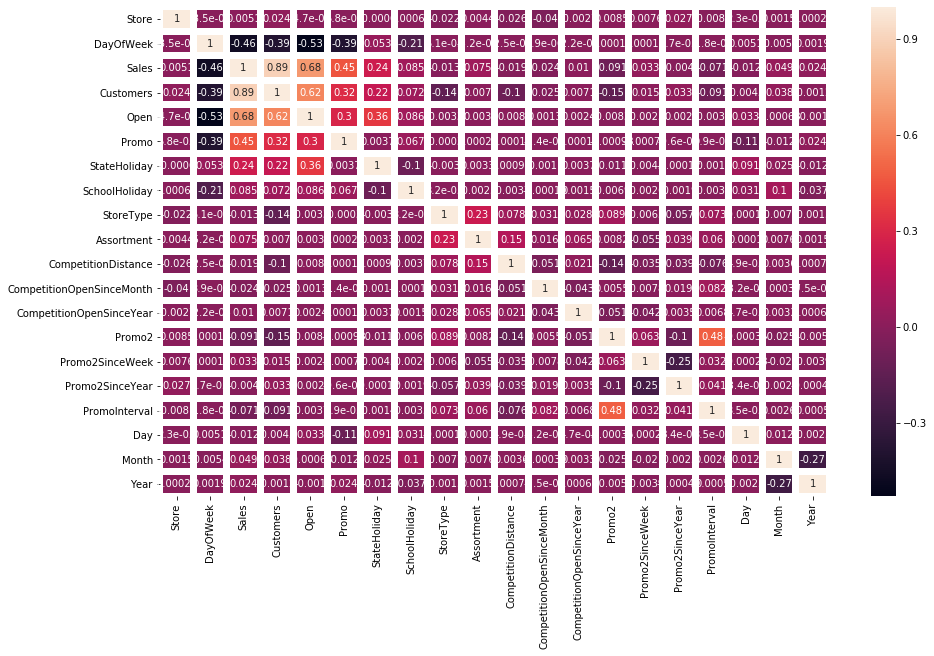

In [40]:
corr = merge_data.corr()
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.heatmap(corr,annot =True, linewidth = 6, cbar = True)


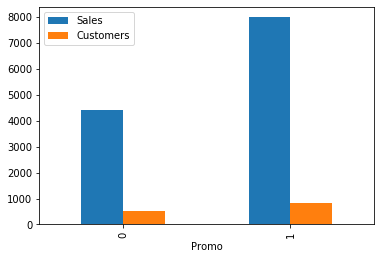

In [41]:
avg_promotion = merge_data[['Sales', 'Customers', 'Promo']].groupby('Promo').mean()
avg_promotion.plot(kind='bar')

In [42]:
merge_data.dtypes

Store                          int64
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                   int64
SchoolHoliday                  int64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                float64
Day                            int64
Month                          int64
Year                           int64
dtype: object

In [43]:
merge_data.shape

(1017209, 20)

# Model Building
# Decision Tree

In [44]:
X = merge_data.drop(['Sales'], axis = 1)
y = np.log(merge_data['Sales'] + 1)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2,random_state = 1234)

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
dt = DecisionTreeRegressor(max_depth=25)
dt.fit(X_train , y_train)
y_pred_dt = dt.predict(X_val)

In [48]:
from sklearn.metrics import r2_score , mean_squared_error

print(r2_score(y_val , y_pred_dt))
print(np.sqrt(mean_squared_error(y_val , y_pred_dt))*100)

0.9994195590284778
7.980899325817931
